### Import

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import sklearn.linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

In [2]:
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False

## 데이터베이스 생성

### Creating table

In [433]:
sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""

In [442]:
professor_df = pd.read_excel("/Users/99ksh/TDB/professor.xlsx")
course_classed_df = pd.read_excel("/Users/99ksh/TDB/course_classed.xlsx")
norm_course_df = pd.read_excel("/Users/99ksh/TDB/norm_course.xlsx")
charge_df = pd.read_excel("/Users/99ksh/TDB/charge.xlsx")
university_df = pd.read_excel("/Users/99ksh/TDB/university.xlsx")

In [443]:
professor_df = professor_df.iloc[:, 1:]
course_classed_df = course_classed_df.iloc[:, 1:]
norm_course_df = norm_course_df.iloc[:, 1:]
charge_df = charge_df.iloc[:, 1:]
university_df = university_df.iloc[:, 1:]

In [444]:
university_df.rename(columns={"사립/국립 구분": "구분"}, inplace=True)
university_df.rename(columns={"대학소재지(시/도)": "대학소재지"}, inplace=True)

In [445]:
con = sqlite3.connect('kocw.db')

In [446]:
cur = con.cursor()
cur.execute(sql_query)
con.execute("PRAGMA foreign_keys = ON")
print(cur.fetchall())

[]


In [447]:
cur.execute("DROP TABLE IF EXISTS charge")
cur.execute("DROP TABLE IF EXISTS norm_course")
cur.execute("DROP TABLE IF EXISTS course_classed")
cur.execute("DROP TABLE IF EXISTS professor")
cur.execute("DROP TABLE IF EXISTS university")

In [448]:
university = """ CREATE TABLE university (
            제공대학명 CHAR(50) PRIMARY KEY NOT NULL UNIQUE,
            대학소재지 CHAR(50) ,
            구분 CHAR(50)
        ); """

In [449]:
professor = """ CREATE TABLE professor (
            교수코드 INTEGER PRIMARY KEY NOT NULL UNIQUE,
            담당교수명 CHAR(50) ,
            담당분야 CHAR(50),
            소속대학명 CHAR(50),
            FOREIGN KEY (소속대학명) REFERENCES university (제공대학명)
                ON UPDATE CASCADE
                ON DELETE SET NULL
        ); """

In [450]:
norm_course = """ CREATE TABLE norm_course (
    강의코드 INTEGER PRIMARY KEY NOT NULL UNIQUE,
    강의명 CHAR(50),
    강의년도 INTEGER,
    강의학기 INT,
    제공대학명 CHAR(50),
    제공일자 DATE,
    FOREIGN KEY (제공대학명) REFERENCES university (제공대학명)
    
        ); """

In [451]:
course_classed  = """ CREATE TABLE course_classed (
    강의명 CHAR(50) PRIMARY KEY NOT NULL UNIQUE,
    교육분류 CHAR(50)
        ); """

In [452]:
charge = """ CREATE TABLE charge (
    교수코드 INTEGER,
    강의코드 INTEGER,
    PRIMARY KEY (교수코드, 강의코드),
    FOREIGN KEY (교수코드) REFERENCES professor (교수코드)
        ON UPDATE CASCADE
        ON DELETE CASCADE,
    FOREIGN KEY (강의코드) REFERENCES norm_course (강의코드)
        ON UPDATE CASCADE
        ON DELETE CASCADE
        ); """

### Input data

In [453]:
cur.execute(university)
print(university_df.itertuples())
for row in university_df.itertuples():
    university_1 = "INSERT INTO university(제공대학명, 대학소재지, 구분) VALUES (?, ?, ?)"
    cur.execute(university_1, (row[1], row[2], row[3]))
con.commit()
#cur.execute('DELETE FROM target_db')
cur.execute('SELECT * FROM university')

In [454]:
cur.execute(professor)
print(professor_df.itertuples())
for row in professor_df.itertuples():
    professor_1 = "INSERT INTO professor(교수코드, 담당교수명, 담당분야, 소속대학명) VALUES (?, ?, ?, ?)"
    cur.execute(professor_1, (row[1], row[2], row[3], row[4]))
con.commit()
cur.execute('SELECT * FROM professor')

In [455]:
cur.execute(norm_course)
print(norm_course_df.itertuples())
for row in norm_course_df.itertuples():
    norm_course_1 = "INSERT INTO norm_course(강의코드, 강의명, 강의년도, 강의학기, 제공대학명, 제공일자) VALUES (?, ?, ?, ?, ?, ?)"
    cur.execute(norm_course_1, (row[1], row[2], row[3], row[4], row[5], row[6]))
con.commit()
cur.execute('SELECT * FROM norm_course')
#cur.fetchall()

In [456]:
cur.execute(course_classed)
print(course_classed_df.itertuples())
for row in course_classed_df.itertuples():
    course_classed_1 = "INSERT INTO course_classed(강의명, 교육분류) VALUES (?, ?)"
    cur.execute(course_classed_1, (row[1], row[2]))
con.commit()
cur.execute('SELECT * FROM course_classed')
#cur.fetchall()

In [457]:
cur.execute(charge)
print(charge_df.itertuples())
for row in charge_df.itertuples():
    charge_1 = "INSERT INTO charge(교수코드, 강의코드) VALUES (?, ?)"
    cur.execute(charge_1, (row[1], row[2]))
con.commit()
cur.execute('SELECT * FROM charge')
#cur.fetchall()

In [459]:
cur.execute(sql_query)
cur.fetchall()

[('university',),
 ('professor',),
 ('norm_course',),
 ('course_classed',),
 ('charge',)]

In [327]:
conn.close

<function Connection.close()>

### Result

In [460]:
rows = cur.execute("SELECT name FROM sqlite_master WHERE type = 'table'")
tables = [row[0] for row in rows]
print(tables)

def sql_identifier(s):
    return '"' + s.replace('"', '""') + '"'

for table in tables:
    print("table: " + table)
    rows = cur.execute("PRAGMA table_info({})".format(sql_identifier(table)))
    print(rows.fetchall())
    rows = cur.execute("PRAGMA foreign_key_list({})".format(sql_identifier(table)))
    print(rows.fetchall())

['university', 'professor', 'norm_course', 'course_classed', 'charge']
table: university
[(0, '제공대학명', 'CHAR(50)', 1, None, 1), (1, '대학소재지', 'CHAR(50)', 0, None, 0), (2, '구분', 'CHAR(50)', 0, None, 0)]
[]
table: professor
[(0, '교수코드', 'INTEGER', 1, None, 1), (1, '담당교수명', 'CHAR(50)', 0, None, 0), (2, '담당분야', 'CHAR(50)', 0, None, 0), (3, '소속대학명', 'CHAR(50)', 0, None, 0)]
[(0, 0, 'university', '소속대학명', '제공대학명', 'CASCADE', 'SET NULL', 'NONE')]
table: norm_course
[(0, '강의코드', 'INTEGER', 1, None, 1), (1, '강의명', 'CHAR(50)', 0, None, 0), (2, '강의년도', 'INTEGER', 0, None, 0), (3, '강의학기', 'INT', 0, None, 0), (4, '제공대학명', 'CHAR(50)', 0, None, 0), (5, '제공일자', 'DATE', 0, None, 0)]
[(0, 0, 'university', '제공대학명', '제공대학명', 'NO ACTION', 'NO ACTION', 'NONE')]
table: course_classed
[(0, '강의명', 'CHAR(50)', 1, None, 1), (1, '교육분류', 'CHAR(50)', 0, None, 0)]
[]
table: charge
[(0, '교수코드', 'INTEGER', 0, None, 1), (1, '강의코드', 'INTEGER', 0, None, 2)]
[(0, 0, 'norm_course', '강의코드', '강의코드', 'CASCADE', 'CASCADE', 'NON

## DB 조작 및 정보 추출

In [293]:
sql_query = """SELECT name FROM sqlite_master
    WHERE type='table';"""

conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()
cur.execute(sql_query)
print(cur.fetchall())
conn.execute("PRAGMA foreign_keys = 1")

[('university',), ('professor',), ('course_classed',), ('norm_course',), ('charge',)]


### 1. 기본키 설정이 맞는지 확인 + 튜플의 수정 및 삭제

In [ ]:
## professor 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상

In [298]:
cur.execute("INSERT INTO professor VALUES(-1, '강신성', '자연계열', '전북대학교')")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(-1, '강신성', '자연계열', '전북대학교'),
 (0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교')]

In [299]:
## 수정
cur.execute("UPDATE professor SET 제공대학명 = '조선대학교' WHERE 교수코드 = -1")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(-1, '강신성', '자연계열', '조선대학교'),
 (0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교')]

In [300]:
## 삭제
cur.execute("DELETE FROM professor WHERE 교수코드 = -1")
cur.execute("SELECT * FROM professor LIMIT 5")
cur.fetchall()

[(0, '안상욱', '자연계열', '한경대학교'),
 (1, '이중호', '자연계열', '가천대학교'),
 (2, '최수한', '자연계열', '단국대학교'),
 (3, '김문현', '자연계열', '성균관대학교'),
 (4, '이상준', '자연계열', '덕성여자대학교')]

In [143]:
## university 중복되지 않은 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO university VALUES('1조대학교', '뉴욕', '사립')")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립'),
 ('1조대학교', '뉴욕', '사립')]

In [144]:
## 수정
cur.execute("UPDATE university SET 대학소재지 = '도쿄' WHERE 제공대학명 = '1조대학교'")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립'),
 ('1조대학교', '도쿄', '사립')]

In [145]:
## 삭제
cur.execute("DELETE FROM university WHERE 제공대학명 = '1조대학교'")
cur.execute("SELECT * FROM university LIMIT 10 OFFSET 182")
cur.fetchall()

[('사이버한국외국어대학교', '서울특별시', '사립'),
 ('수원대학교', '경기도', '사립'),
 ('구미대학교', '경상북도', '사립'),
 ('가톨릭관동대학교', '강원특별자치도', '사립')]

In [146]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO professor VALUES(1, '강신성2', '자연계열', '전북대학교')")

IntegrityError: UNIQUE constraint failed: professor.교수코드

In [304]:
# 기존 university 테이블
cur.execute("SELECT * FROM university LIMIT 10")
cur.fetchall()

[('한경대학교', '경기도', '국립'),
 ('가천대학교', '경기도', '사립'),
 ('단국대학교', '경기도', '사립'),
 ('성균관대학교', '서울특별시', '사립'),
 ('덕성여자대학교', '서울특별시', '사립'),
 ('과학기술연합대학원대학교', '대전광역시', '국립'),
 ('국민대학교', '서울특별시', '사립'),
 ('금오공과대학교', '경상북도', '국립'),
 ('전북대학교', '전라북도', '국립'),
 ('건국대학교', '서울특별시', '사립')]

In [306]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO university VALUES('전북대학교', '뉴욕', '국립')")

IntegrityError: UNIQUE constraint failed: university.제공대학명

In [148]:
## norm_course 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO norm_course VALUES(-1, '윤리학개론', '2025', '3', '연세대학교', '2025-09-09')")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(-1, '윤리학개론', 2025, 3, '연세대학교', '2025-09-09'),
 (127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30')]

In [149]:
## 수정
cur.execute("UPDATE norm_course SET 강의명 = '수학1' WHERE 강의코드 = -1")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(-1, '수학1', 2025, 3, '연세대학교', '2025-09-09'),
 (127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30')]

In [150]:
## 삭제
cur.execute("DELETE FROM norm_course WHERE 강의코드 = -1")
cur.execute("SELECT * FROM norm_course LIMIT 5")
cur.fetchall()

[(127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30'),
 (128348, '부부 이마고 치료', 2009, 1, '수도국제대학원대학교', '2022-09-28')]

In [151]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO norm_course VALUES(127521, '수학1', '2025', '3', '연세대학교', '2025-09-09')")

IntegrityError: UNIQUE constraint failed: norm_course.강의코드

In [152]:
## course_classed 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO course_classed VALUES('가수업', '가분류')")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('가수업', '가분류'),
 ('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [153]:
## 수정
cur.execute("UPDATE course_classed SET 교육분류 = '나분류' WHERE 강의명 = '가수업'")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('가수업', '나분류'),
 ('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [154]:
## 삭제
cur.execute("DELETE FROM course_classed WHERE 강의명 = '가수업'")
cur.execute("SELECT * FROM course_classed ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[('예방치과학의 이해', '자연과학기타'),
 ('과학사 이해', '자연과학기타'),
 ('회귀분석(II)', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('AI를 위한 딥러닝', '수학ㆍ물리ㆍ천문ㆍ지리'),
 ('다변량통계학(II)', '수학ㆍ물리ㆍ천문ㆍ지리')]

In [155]:
## 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO course_classed VALUES('과학사 이해', '다분류')")
cur.fetchall()

IntegrityError: UNIQUE constraint failed: course_classed.강의명

In [156]:
## charge 중복되지 않는 기본키를 가지는 튜플 삽입 시 정상
cur.execute("INSERT INTO charge VALUES(1, 1112400)")
cur.execute("SELECT * FROM charge ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[(1, 1112400), (8913, 1398367), (852, 820840), (60, 1445911), (7838, 1443736)]

In [157]:
## 삭제
cur.execute("DELETE FROM charge WHERE 교수코드= 1 AND 강의코드= 111240")
cur.execute("SELECT * FROM charge ORDER BY rowid DESC LIMIT 5")
cur.fetchall()

[(1, 1112400), (8913, 1398367), (852, 820840), (60, 1445911), (7838, 1443736)]

In [158]:
## charge 중복되는 기본키를 가지는 튜플 삽입 시 오류 발생 -> 정상적으로 기본키 설정됨
cur.execute("INSERT INTO charge VALUES(1, 1104074)")

IntegrityError: UNIQUE constraint failed: charge.교수코드, charge.강의코드

### 2. 기본키 삭제에 따른 외래키 변화 확인

In [309]:
# 원래 professor 테이블
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5")
cur.fetchall()

[(9, '마인숙', '자연계열', '전북대학교'),
 (103, '곽지이', '자연계열', '전북대학교'),
 (104, '이선영', '자연계열', '전북대학교'),
 (105, '정수미', '자연계열', '전북대학교'),
 (106, '최일선', '자연계열', '전북대학교')]

In [170]:
# norm_course 원래 테이블
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 = '전북대학교' LIMIT 5")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,강의코드,강의명,강의년도,강의학기,제공대학명,제공일자
0,133761,자바 프로그래밍,2009,1,전북대학교,2008-12-11
1,145685,조경수 관리,2009,1,전북대학교,2009-11-05
2,153670,전력전자 및 실험,2009,2,전북대학교,2010-04-28
3,156266,기능생리학 1,2009,1,전북대학교,2010-06-10
4,156446,BIN융합개론및세미나 1,2009,1,전북대학교,2010-06-11


In [172]:
cur.execute("SELECT * FROM university WHERE 제공대학명 = '전북대학교'")
cur.fetchall()

[('전북대학교', '전라북도', '국립')]

In [173]:
#기본키 수정
cur.execute("UPDATE university SET 제공대학명 = '전북특별자치대학교' WHERE 제공대학명 = '전북대학교'")
cur.execute("SELECT * FROM university WHERE 제공대학명 = '전북특별자치대학교'")
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 = '전북특별자치대학교' LIMIT 5")
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5") # 바뀐 내용 보여주기
cur.fetchall()

[]

In [174]:
#원래대로 복구
cur.execute("UPDATE university SET 제공대학명 = '전북대학교' WHERE 제공대학명 = '전북특별자치대학교'")
cur.execute("SELECT * FROM professor WHERE 제공대학명 = '전북대학교' LIMIT 5")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,교수코드,담당교수명,담당분야,제공대학명
0,9,마인숙,자연계열,전북대학교
1,103,곽지이,자연계열,전북대학교
2,104,이선영,자연계열,전북대학교
3,105,정수미,자연계열,전북대학교
4,106,최일선,자연계열,전북대학교


In [176]:
#기본키 삭제(ON DELETE SET NULL) 전북대학교 삭제
cur.execute("DELETE FROM university WHERE 제공대학명 = '전북대학교'")
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 IS NULL LIMIT 5")
cur.execute("SELECT * FROM professor WHERE 제공대학명 IS NULL LIMIT 5")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,교수코드,담당교수명,담당분야,제공대학명
0,9,마인숙,자연계열,None
1,103,곽지이,자연계열,None
2,104,이선영,자연계열,None
3,105,정수미,자연계열,None
4,106,최일선,자연계열,None


In [177]:
cur.execute("SELECT * FROM norm_course WHERE 제공대학명 IS NULL LIMIT 5")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,강의코드,강의명,강의년도,강의학기,제공대학명,제공일자
0,133761,자바 프로그래밍,2009,1,None,2008-12-11
1,145685,조경수 관리,2009,1,None,2009-11-05
2,153670,전력전자 및 실험,2009,2,None,2010-04-28
3,156266,기능생리학 1,2009,1,None,2010-06-10
4,156446,BIN융합개론및세미나 1,2009,1,None,2010-06-11


In [182]:
#기본키 삭제(ON DELETE CASCADE)
cur.execute("SELECT * FROM norm_course WHERE 강의명 = '수학1'")
cur.execute("DELETE FROM course_classed WHERE 강의명 = '수학1'")
cur.execute("SELECT * FROM norm_course WHERE 강의명 = '수학1'")

cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,강의코드,강의명,강의년도,강의학기,제공대학명,제공일자


### 3. 조인 조작의 정상성 여부 확인

#### 조인을 이용해 쪼개기 전 테이블 만들기

In [192]:
conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()

In [186]:
#제공대학명을 기준으로 교수와 제공대학을 내부 조인
cur.execute("SELECT * FROM professor LIMIT 6")
cur.execute("SELECT * FROM university LIMIT 6")
cur.execute("""
    SELECT 교수코드, 담당교수명, 담당분야, university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명 
    LIMIT 6
""")
cur.fetchall()

[(0, '안상욱', '자연계열', '한경대학교', '경기도', '국립'),
 (1, '이중호', '자연계열', '가천대학교', '경기도', '사립'),
 (2, '최수한', '자연계열', '단국대학교', '경기도', '사립'),
 (3, '김문현', '자연계열', '성균관대학교', '서울특별시', '사립'),
 (4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립'),
 (5, '나성호', '자연계열', '과학기술연합대학원대학교', '대전광역시', '국립')]

In [187]:
#위 테이블과 담당을 조인
cur.execute("SELECT * FROM charge LIMIT 6")
cur.execute("""
    SELECT 강의코드, professor.교수코드 AS 교수코드, 담당교수명, 담당분야, university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드 
    LIMIT 6
""")
cur.fetchall()

[(1095582, 0, '안상욱', '자연계열', '한경대학교', '경기도', '국립'),
 (1104074, 1, '이중호', '자연계열', '가천대학교', '경기도', '사립'),
 (1110603, 2, '최수한', '자연계열', '단국대학교', '경기도', '사립'),
 (1112400, 3, '김문현', '자연계열', '성균관대학교', '서울특별시', '사립'),
 (1118072, 4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립'),
 (1118158, 4, '이상준', '자연계열', '덕성여자대학교', '서울특별시', '사립')]

In [188]:
#위 테이블과 강의를 조인
cur.execute("SELECT * FROM norm_course LIMIT 6")
cur.execute("""
    SELECT norm_course.강의코드 AS 강의코드, 강의명, 강의년도, 강의학기, 제공일자,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드
    INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드 
    LIMIT 6
""")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
fetchall = pd.DataFrame.from_records(data=rows, columns=cols)
fetchall

,강의코드,강의명,강의년도,강의학기,제공일자,교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
0,1095582,대학수학1,2015,1,2015-08-30,0,안상욱,자연계열,한경대학교,경기도,국립
1,1104074,수학1,2015,1,2015-09-14,1,이중호,자연계열,가천대학교,경기도,사립
2,1110603,미적분학,2015,1,2015-10-08,2,최수한,자연계열,단국대학교,경기도,사립
3,1112400,공학수학1,2015,1,2015-11-02,3,김문현,자연계열,성균관대학교,서울특별시,사립
4,1118072,정수론,2015,2,2015-12-16,4,이상준,자연계열,덕성여자대학교,서울특별시,사립
5,1118158,확률론,2015,2,2015-12-16,4,이상준,자연계열,덕성여자대학교,서울특별시,사립


In [189]:
#위 테이블과 강의교육분류를 내부 조인
cur.execute("SELECT * FROM course_classed LIMIT 6")
cur.execute("""
    SELECT norm_course.강의코드 AS 강의코드, 강의년도, 강의학기, 제공일자,
           course_classed.강의명 AS 강의명, 교육분류,
           professor.교수코드 AS 교수코드, 담당교수명, 담당분야,
           university.제공대학명 AS 제공대학명, 대학소재지, 구분
    FROM university 
    INNER JOIN professor ON university.제공대학명 = professor.제공대학명
    INNER JOIN charge ON professor.교수코드 = charge.교수코드
    INNER JOIN norm_course ON charge.강의코드 = norm_course.강의코드
    INNER JOIN course_classed ON norm_course.강의명 = course_classed.강의명 
    LIMIT 6
""")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
data_df = pd.DataFrame.from_records(data=rows, columns=cols)
data_df

,강의코드,강의년도,강의학기,제공일자,강의명,교육분류,교수코드,담당교수명,담당분야,제공대학명,대학소재지,구분
0,1095582,2015,1,2015-08-30,대학수학1,수학ㆍ물리ㆍ천문ㆍ지리,0,안상욱,자연계열,한경대학교,경기도,국립
1,1104074,2015,1,2015-09-14,수학1,수학ㆍ물리ㆍ천문ㆍ지리,1,이중호,자연계열,가천대학교,경기도,사립
2,1110603,2015,1,2015-10-08,미적분학,수학ㆍ물리ㆍ천문ㆍ지리,2,최수한,자연계열,단국대학교,경기도,사립
3,1112400,2015,1,2015-11-02,공학수학1,수학ㆍ물리ㆍ천문ㆍ지리,3,김문현,자연계열,성균관대학교,서울특별시,사립
4,1118072,2015,2,2015-12-16,정수론,수학ㆍ물리ㆍ천문ㆍ지리,4,이상준,자연계열,덕성여자대학교,서울특별시,사립
5,1118158,2015,2,2015-12-16,확률론,수학ㆍ물리ㆍ천문ㆍ지리,4,이상준,자연계열,덕성여자대학교,서울특별시,사립


### 4. 정보 추출을 위한 주요 변수 및 목표 서술

> 대학소재지, 대학명, 대학구분, 강의년도, 강의학기
-> 시간의 흐름에 따라 제공되는 강의 수가 어떻게 바뀌는지

In [268]:
conn = sqlite3.connect("/Users/99ksh/TDB/kocw.db")
cur = conn.cursor()

In [362]:
cur.execute("SELECT * FROM norm_course LIMIT 6")
cur.fetchall()

[(127521, '윤리학 개론', 2009, 1, '연세대학교', '2009-03-12'),
 (127676, '발명과 특허', 2009, 1, '부경대학교', '2009-04-30'),
 (128045, '연구방법론', 2009, 1, '삼육대학교', '2015-08-30'),
 (128322, '사회복지 개론', 2009, 1, '을지대학교', '2009-06-30'),
 (128348, '부부 이마고 치료', 2009, 1, '수도국제대학원대학교', '2022-09-28'),
 (128362, '레크리에이션 지도', 2009, 1, '공주대학교', '2009-06-30')]

In [363]:
cur.execute("""SELECT COUNT(*) AS 강의수, 강의년도, 강의학기
               FROM norm_course GROUP BY 강의년도, 강의학기
""")

cur.fetchall()

[(1, 2007, 1),
 (1414, 2009, 1),
 (85, 2009, 2),
 (179, 2010, 1),
 (205, 2010, 2),
 (431, 2011, 1),
 (466, 2011, 2),
 (714, 2012, 1),
 (724, 2012, 2),
 (771, 2013, 1),
 (769, 2013, 2),
 (777, 2014, 1),
 (951, 2014, 2),
 (799, 2015, 1),
 (975, 2015, 2),
 (718, 2016, 1),
 (801, 2016, 2),
 (621, 2017, 1),
 (861, 2017, 2),
 (469, 2018, 1),
 (576, 2018, 2),
 (466, 2019, 1),
 (641, 2019, 2),
 (378, 2020, 1),
 (635, 2020, 2),
 (666, 2021, 1),
 (480, 2021, 2),
 (213, 2022, 1),
 (28, 2022, 2)]

In [364]:
cur.execute("""SELECT COUNT(*) AS 강의수, 강의년도, 강의학기
               FROM norm_course GROUP BY 강의년도, 강의학기
""")
cols = [column[0] for column in cur.description]  # 열 이름 가져오기
rows = cur.fetchall()  # 행 정보 가져오기
df_time = pd.DataFrame.from_records(data=rows, columns=cols)
df_time

,강의수,강의년도,강의학기
0,1,2007,1
1,1414,2009,1
2,85,2009,2
3,179,2010,1
4,205,2010,2
5,431,2011,1
6,466,2011,2
7,714,2012,1
8,724,2012,2
9,771,2013,1


<Axes: xlabel='강의년도'>

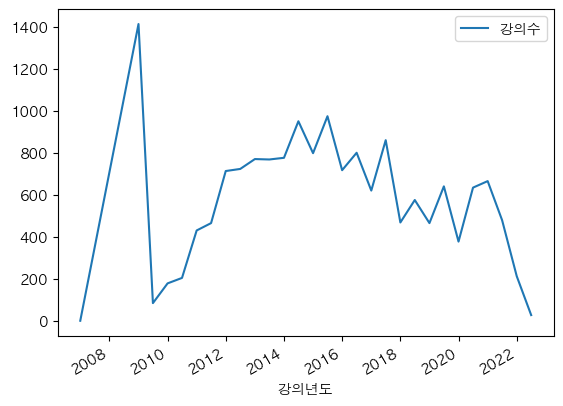

In [382]:
## 해당 코드는 발표 시 블락처리(필요 없음)
featured_df = df_time.assign(강의학기 = lambda _df : _df.강의학기.map(lambda x : '-01-01' if x == 1 else '-07-01'))\
.assign(강의년도 = lambda _df : _df.astype('str').강의년도).assign(강의년도 = lambda _df : _df.강의년도 + _df.강의학기)\
.drop('강의학기', axis = 1).assign(강의년도 = lambda _df : pd.to_datetime(_df.강의년도))

featured_df.plot.line(x = '강의년도', y = '강의수')

- 강의 수가 증가하질 않는다. 왜그럴까?

- K-MOOC 운영 개시일 : 2015년 10월.
- 실제로 2015년 2학기를 기점으로 강의 수가 내려가는 추세인 것을 확인할 수 있음. 기존에 KOCW에서만 강의가 제공되었지만 K-MOOC이 새로 서비스를 시작하면서 제공되는 강의들이 KOCW와 K-MOOC으로 나뉘어져서 KOCW에 대한 의존도가 줄어들었기 떄문에 나타나는 현상이라고 생각된다.


https://namu.wiki/w/K-MOOC

상단 링크의 해당 표를 이용하여 해석(운영개시일)
첫 이상치는 운영 개시 후 사실상 첫 시기라 많았다고 해석하면 됨. 또는 2007년과 2009년 1학기 사이 값들이 집계가 잘못되었기 때문에 발생했다고 생각할 수도 있음. 아무튼 이상치라 제거가 가능하다.

2015-2학기의 값과 해당 정보를 기반으로 설명.

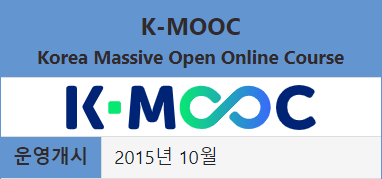

추출하고자하는 정보를 +위해서 조인 및 추출 조작을 통해서 (외부) 데이터 프레임 구성

## 구간 별 회귀분석

In [381]:
## 해당 코드는 발표 시 블락처리하고, 그냥 아래 데이터프레임처럼 만들었다고 해주세요.
featured_df = df_time.assign(강의학기 = lambda _df : _df.강의학기.map(lambda x : '-01-01' if x == 1 else '-07-01'))\
.assign(강의년도 = lambda _df : _df.astype('str').강의년도).assign(강의년도 = lambda _df : _df.강의년도 + _df.강의학기)\
.drop('강의학기', axis = 1).assign(강의년도 = lambda _df : pd.to_datetime(_df.강의년도))

featured_df

,강의수,강의년도
0,1,2007-01-01
1,1414,2009-01-01
2,85,2009-07-01
3,179,2010-01-01
4,205,2010-07-01
5,431,2011-01-01
6,466,2011-07-01
7,714,2012-01-01
8,724,2012-07-01
9,771,2013-01-01


<Axes: xlabel='강의년도'>

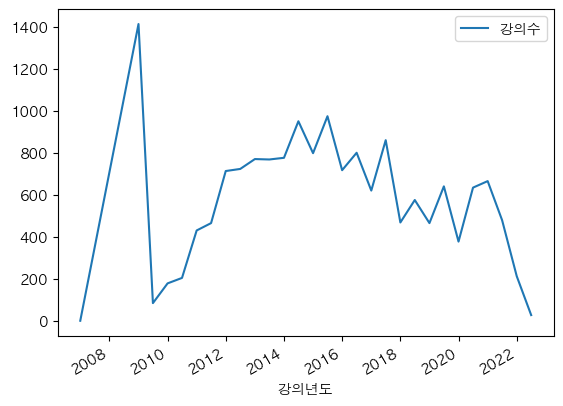

In [382]:
featured_df.plot.line(x = '강의년도', y = '강의수')

In [368]:
## 1. data
X = pd.DataFrame({'강의년도' : list(featured_df.drop(1).index)}).assign(구간 = lambda _df : _df.강의년도.map(lambda x : 0 if x <= 14 else x - 14))
X.iloc[0, 0] = -3
y = featured_df.drop(1).강의수

In [369]:
## 2. predictor
predictr = sklearn.linear_model.LinearRegression()

In [370]:
## 3. fitting
predictr.fit(X, y)

LinearRegression()

In [371]:
## 4. prediction
yhat = predictr.predict(X)
yhat_matrix = pd.DataFrame({'yhat' : yhat}, index = y.index).reset_index().rename({"yhat" : "강의수"}, axis = 1)\
.merge(featured_df.강의년도.reset_index()).drop("index", axis = 1)

In [13]:
yhat_matrix

,강의수,강의년도
0,-56.181910,2007-01-01
1,234.537627,2009-07-01
2,292.681535,2010-01-01
3,350.825442,2010-07-01
4,408.969350,2011-01-01
5,467.113257,2011-07-01
6,525.257165,2012-01-01
7,583.401072,2012-07-01
8,641.544980,2013-01-01
9,699.688887,2013-07-01


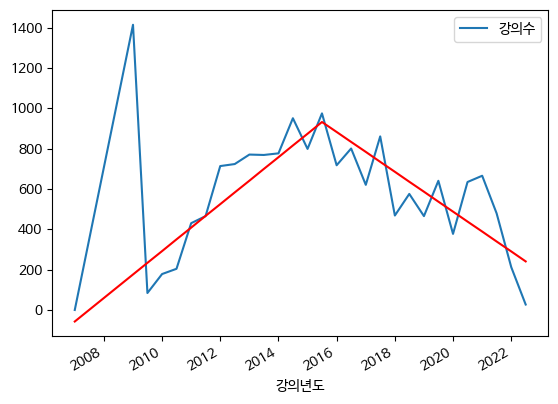

In [12]:
fig, ax = plt.subplots()
featured_df.plot.line(x="강의년도", y="강의수", ax=ax)

ax.plot(yhat_matrix.강의년도, yhat_matrix.강의수, linestyle='-', color='r')

plt.show()